In [1]:
# Illustrate basic properties of Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf 

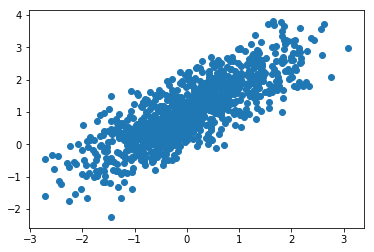

In [31]:
mean = [0, 1, 0.3]
cov = [[1.0, 0.8, 0.2],
       [0.8, 1.0, 0.0],
       [0.2, 0.0, 1.0]]
x1, x2, x3 = np.random.multivariate_normal(mean, cov, 1000).T
plt.scatter(x1, x2)

In [32]:
y = 1.5 + 2*x1 + 3 * x2 + np.random.normal(size=1000)
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res1 = smf.ols('y ~ x1 + x2', data = df).fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                 1.034e+04
Date:                Mon, 28 May 2018   Prob (F-statistic):               0.00
Time:                        11:06:29   Log-Likelihood:                -1464.6
No. Observations:                1000   AIC:                             2935.
Df Residuals:                     997   BIC:                             2950.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4599      0.065     22.354      0.000       1.332       1.588
x1             1.9849      0.056     35.328      0.000       1.875       2.095
x2             3.0419      0.057     53.322      0.000       2.930       3.154
==============================================================================
Omnibus:                        2.927   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.231   Jarque-Bera (JB):                2.780
Skew:                          -0.115   Prob(JB):                        0.249
Kurtosis:                       3.118   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

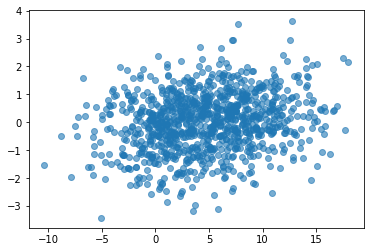

In [33]:
plt.scatter(y, res1.resid, alpha = 0.6)

In [34]:
res2 = smf.ols('y ~ x1 + x2 +x1*x2', data = df).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     6888.
Date:                Mon, 28 May 2018   Prob (F-statistic):               0.00
Time:                        11:06:34   Log-Likelihood:                -1464.6
No. Observations:                1000   AIC:                             2937.
Df Residuals:                     996   BIC:                             2957.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4571      0.069     21.229      0.000       1.322       1.592
x1             1.9807      0.064     30.921      0.000       1.855       2.106
x2             3.0417      0.057     53.269      0.000       2.930       3.154
x1:x2          0.0038      0.028      0.135      0.892      -0.052       0.059
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.773
Skew:                          -0.115   Prob(JB):                        0.250
Kurtosis:                       3.118   Cond. No.                         7.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Compare between res1 and res2 (with a dubious interaction between x1 and x2):
- Similar R2 around 95% <br>
- Similar Log Likelihood, AIC, BIC value <br>

But P-value corresponding to x1:x2 is very large, so it may be reasonable not to use this value.


In [35]:
# Expected Value of Residuals = 0
print(np.isclose(np.mean(res1.resid), 0))

True


In [36]:
print("Covariance between Residuals and x1 are 0")
np.cov(res1.resid, df.x1)

Covariance between Residuals and x1 are 0


array([[  1.09681537e+00,   3.31317945e-15],
       [  3.31317945e-15,   1.00967556e+00]])

In [37]:
print("Covariance between Residuals and x2 are 0")
np.cov(res1.resid, df.x2)

Covariance between Residuals and x2 are 0


array([[  1.09681537e+00,   3.59316625e-15],
       [  3.59316625e-15,   9.79286921e-01]])

In [38]:
y = 1.5 + 2*x1 + 3 * x2 + 4*x3
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res3 = smf.ols('y ~ x1 + x2', data = df).fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     913.8
Date:                Mon, 28 May 2018   Prob (F-statistic):          3.50e-226
Time:                        11:06:48   Log-Likelihood:                -2742.9
No. Observations:                1000   AIC:                             5492.
Df Residuals:                     997   BIC:                             5507.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7071      0.234     20.073      0.000       4.247       5.167
x1             4.2122      0.202     20.880      0.000       3.816       4.608
x2             1.0283      0.205      5.020      0.000       0.626       1.430
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.166
Skew:                          -0.096   Prob(JB):                        0.339
Kurtosis:                       3.123   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated coiefficients are very different from the true values: 4.2 vs 2.0 and 1.0 vs 3.0. <br>
We have induced correlation between the error term and the independent variables, but the observations still hold. Linear Regression estimators always follow these relationships between the residuals (not the errors) and the independent variables.

In [39]:
print(np.isclose(np.mean(res3.resid),0))
print(np.cov(res3.resid, df.x1))
print(np.cov(res3.resid, df.x2))

True
[[  1.41398444e+01   2.09108673e-15]
 [  2.09108673e-15   1.00967556e+00]]
[[  1.41398444e+01   2.20488737e-15]
 [  2.20488737e-15   9.79286921e-01]]


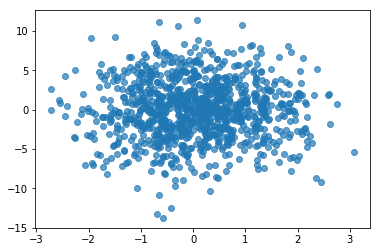

In [40]:
plt.scatter(x1, res3.resid, alpha = 0.7)

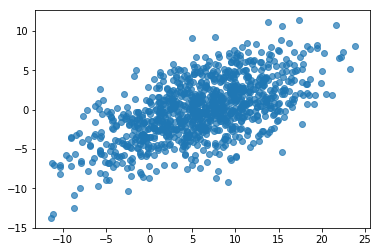

In [41]:
plt.scatter(y, res3.resid, alpha = 0.7)

There is obviously some relationship betwen y and the residuals. This is the case of obmitted variable bias: the residuals still contain some information about y. This handout explains this problem well:
https://www.albany.edu/faculty/kretheme/PAD705/SupportMat/OVB.pdf

The implication is that our estimated value of the parameters are biased, as I illustrate below.

In [42]:
N = 1000
from sklearn.utils import resample

x1_coeffs, x2_coeffs = [], []
for i in range(N):
    tmp_df = resample(df)
    tmp_model = smf.ols('y ~ x1 + x2', data = tmp_df).fit()
    x1_coeffs.append(tmp_model.params['x1'])
    x2_coeffs.append(tmp_model.params['x2'])

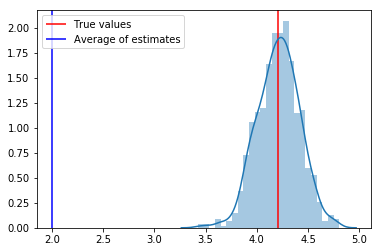

In [43]:
sns.distplot(x1_coeffs)
plt.vlines(np.mean(x1_coeffs), 0.0, 2.5, colors = 'red', label = 'True values')
plt.vlines(2.0, 0.0, 2.5, colors= 'blue', label = 'Average of estimates')
plt.legend()

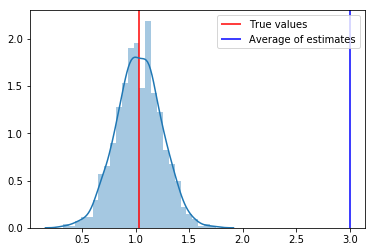

In [44]:
sns.distplot(x2_coeffs)
plt.vlines(np.mean(x2_coeffs), 0.0, 2.5, colors = 'red', label = 'True values')
plt.vlines(3.0, 0.0, 2.5, colors= 'blue', label = 'Average of estimates')
plt.legend()

We can see that our estimates are far from the real values. Let's see how we can remediate that.

In [45]:
df_res = pd.DataFrame({'x1':x1, 'x2':x2, 'res': res3.resid})
res3_residuals = smf.ols('res ~ x1 + x2', data = df_res).fit()
res3_residuals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    res   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                     0.000
Date:                Mon, 28 May 2018   Prob (F-statistic):               1.00
Time:                        18:31:50   Log-Likelihood:                -2742.9
No. Observations:                1000   AIC:                             5492.
Df Residuals:                     997   BIC:                             5507.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.58e-15      0.234   1.53e-14      1.000      -0.460       0.460
x1          5.967e-16      0.202   2.96e-15      1.000      -0.396       0.396
x2          1.818e-15      0.205   8.88e-15      1.000      -0.402       0.402
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.166
Skew:                          -0.096   Prob(JB):                        0.339
Kurtosis:                       3.123   Cond. No.                         4.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Disappointedly, $R^2$ = 0, the residuals are not related to the independent variables at all. Let's try it again with a different covariance matrix.

In [70]:
mean = [0, 1, 0.3]
cov = [[1.0, 0.8, 0.2],
       [0.8, 1.0, 0.2],
       [0.2, 0.2, 1.0]]
x1, x2, x3 = np.random.multivariate_normal(mean, cov, 1000).T

y = 1.5 + 2*x1 + 3 * x2 + 4*x3
df = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})

def BootStrapPlot(data, N=1000):
    x1_coeffs, x2_coeffs = [], []
    for i in range(N):
        tmp_df = resample(data)
        tmp_model = smf.ols('y ~ x1 + x2', data = tmp_df).fit()
        x1_coeffs.append(tmp_model.params['x1'])
        x2_coeffs.append(tmp_model.params['x2'])
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (8,4))

    sns.distplot(x1_coeffs, ax=ax1)
    ax1.vlines(np.mean(x1_coeffs), 0.0, 2.5, colors = 'red', label = 'True values')
    ax1.vlines(2.0, 0.0, 2.5, colors= 'blue', label = 'Average of estimates')
    ax1.legend()
    ax1.set_xlim((0, 4.5))
    ax1.set_title("x2")

    sns.distplot(x2_coeffs, ax=ax2)
    ax2.vlines(np.mean(x2_coeffs), 0.0, 2.5, colors = 'red', label = 'True values')
    ax2.vlines(3.0, 0.0, 2.5, colors= 'blue', label = 'Average of estimates')
    ax2.legend()
    ax2.set_xlim((0, 4.5))
    ax2.set_title("x3")
    
    return x1_coeffs, x2_coeffs

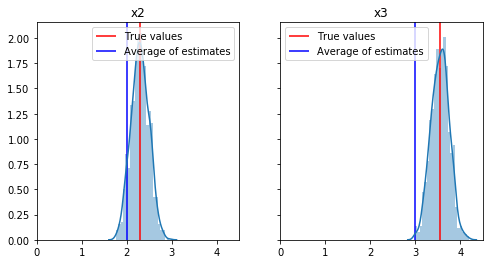

In [71]:
x1_coeffs, x2_coeffs = BootStrapPlot(df)

Depending on the covariance matrix, the bias may be large or small. I wonder how we can know the covariance matrix if we don't know x3.

## Some theory
According to Wikipedia and to my memory, the 4 assumptions of Linear Regression that ensure the estimators are unbiased are:
- Correctly specify the model, ie: linear relationship is correct
- The error terms are iid ( no time series here)
- No multicollinearity (so that the inverse of covariance matrix exists)
- Homoskedasticity

Notice that there are no assumption that X are normally distributed. The assumption that the error is normally distributed only helps with hypothesis testing, not with the unbiasedness of the estimator.

It's a little difficult to see homosekdasticity in the example above. Let's try something else.

In [77]:
bins = []
for i in range(4):
    bins.append(np.percentile(x1, i*25))
print(bins)

[-3.045230290768504, -0.63298974394006757, 0.019829138581566805, 0.63211712133956177]


In [78]:
inds = np.digitize(x1, bins)

In [79]:
error = inds * np.random.normal(size=1000)
y = 1.5 + 2*x1 + 3 * x2 + error
df_hetero = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
res4 = smf.ols('y ~ x1 + x2', data = df_hetero).fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1462.
Date:                Mon, 28 May 2018   Prob (F-statistic):          3.65e-297
Time:                        21:19:28   Log-Likelihood:                -2454.4
No. Observations:                1000   AIC:                             4915.
Df Residuals:                     997   BIC:                             4929.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4513      0.170      8.535      0.000       1.118       1.785
x1             1.9732      0.148     13.361      0.000       1.683       2.263
x2             3.0296      0.143     21.209      0.000       2.749       3.310
==============================================================================
Omnibus:                       56.073   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.842
Skew:                          -0.077   Prob(JB):                     1.48e-44
Kurtosis:                       5.196   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see some level of hetero-skedasticity here, but the residuals still have 0 correlation with x1 and x2

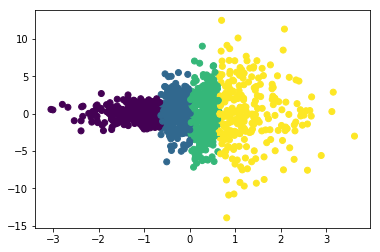

In [80]:
plt.scatter(x1, error, c = inds)

In [81]:
print(np.isclose(np.mean(res4.resid),0))
print(np.cov(res4.resid, df.x1))
print(np.cov(res4.resid, df.x2))

True
[[  7.93949005e+00   6.78358493e-16]
 [  6.78358493e-16   9.89706540e-01]]
[[  7.93949005e+00   1.67144688e-16]
 [  1.67144688e-16   1.05792692e+00]]


In [82]:
np.cov(error, df_hetero.x1)

array([[  7.93983743e+00,  -2.52062846e-03],
       [ -2.52062846e-03,   9.89706540e-01]])

If we look at the graph, we can see that the covariance above does not tell us much about the relationship between the error term and x1. <br>
Coefficients are still statistically significant, but we have lower R-squared and hetero-skedasticity. The heteroskedasticity can be recognized by looking at the residuals.

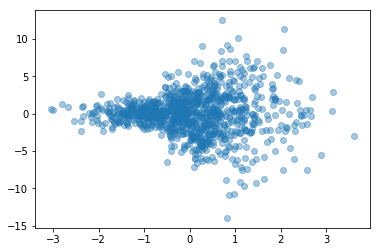

In [83]:
plt.scatter(df_hetero.x1, res4.resid, alpha = 0.4)

Let's use Bootstrap to see what happens to our estimates.

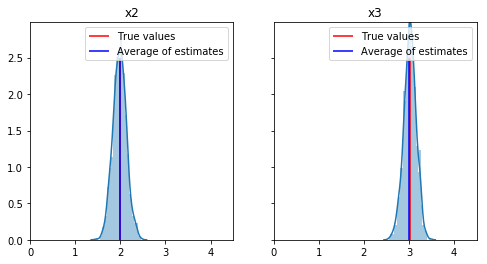

In [84]:
x1_coeffs, x2_coeffs = BootStrapPlot(df_hetero)

Our estimates are still unbiased. Further reading confirms this [here](https://www3.nd.edu/~rwilliam/stats2/l25.pdf)